# Seminar 1: Instrumental Variables
### Applied Econometrics
### IES FSV UK

Lenka Nechvátalová

lenka.nechvatalova@fsv.cuni.cz

---
## Outline

- Why might an explanatory variable be correlated with the error term?
- Estimation with instrumental variables: 2SLS
- Examples in R

---
### Resources:
- textbook Wooldridge, Introductory Econometrics: a Modern Approach
- textbook Greene, Econometric analysis
- Ben Lambert videos (e.g. [Endogeneity and Instrumental Variables](https://www.youtube.com/watch?v=lLI-0pK9MD8), [Instrumental Variables intuition - part 1](https://www.youtube.com/watch?v=OWHCbEP56ms&t=4s) and others)

---
## Why might $x$ be correlated with the error term?

Consider a simple linear regression model:

$$y_i = \beta_0 + \beta_1 x_i + u_i$$

Key assumption of the OLS estimator:

$$E(u|x) = 0 \Rightarrow \big[Cov(x,u) = 0 \text{ and } E(u)=0\big] \Rightarrow E(x u) = 0,$$

or in general: $E(\mathbf{X}'\mathbf{u})=\boldsymbol{0}$ for a multiple linear regression model under matrix notation. This implies OLS is an unbiased and consistent estimator.

If $E(x u) \neq 0$, we face the endogeneity issue and such explanatory variables are called endogenous variables.

#### Reasons for endogeneity

- omitted variables
- simultaneity (e.g. price and quantity) or reverse causality
- measurement error, problematic proxy variable

---
## Example 1: Labour economics

Suppose we are interested in the returns to education, i.e. in the effect of education on wages:

$$wage_i = \beta_0 + \beta_1 education_i + u_i$$

We are surely omitting other important variables, such as measurable (work experience, regional impact) or unobservable (personal motivation, inherent abilities). Moreover, the model's functional form is too simple and thus likely incorrect.

Suppose 'motivation' has a positive effect on wages. And what if motivation also affects education (which is very likely)? Then, the effect of education is overestimated.

Economic intuition: OLS tries to fit the wage level using the included variables; if a variable with positive influence is omitted, the effect of included variables with positive influence is overestimated (to the extent they are correlated) to compensate for the omitted one.

---
## Example 2 (bonus - not mandatory): Consumption and savings

An individual's income is split between consumption $c_i$ and savings $s_i$. According to the mainstream theories of consumption (Permanent income hypothesis), consumption, as well as savings, should depend on permanent income $y_i^*$:

$$c_i = \beta_0 + \beta_1 y_i^* + u_i$$

The size of permanent income, however, is unknown. Therefore, permanent income is typically proxied by current income $y_i$. However, as $y_i$ and $y_i^*$ are only imperfectly related, we experience the problematic proxy variable issue:

$$y_i=y_i^*+v_i$$


The original equation becomes:
\begin{eqnarray}
c_i &=& \beta_0 + \beta_1 (y_i-v_i) + u_i \\
    &=& \beta_0 + \beta_1 y_i \underbrace{- \beta_1 v_i + u_i}_{e_i}
\end{eqnarray}

Is now the assumption $E(y e)=0$ fulfilled?

$$E(y e) = E\big((y^* + v)(- \beta_1 v + u)\big) = E(-\beta_1 v^2) \neq 0$$

$\Rightarrow$ OLS estimation of the savings equation with current income is biased and inconsistent.

---
## Instrumental variables (IV) estimation

If we suspect endogeneity and are interested in causality, IV estimation is used instead of OLS. What makes a good instrument?

The instrument should be a variable $z$ such that:

- $z$ is uncorrelated with the error term. i.e. it is exogenous: $Cov(z,u) = 0$
- $z$ is correlated with endogenous variable: $Cov(z,x) \neq 0$

The exogeneity assumption cannot be typically tested; we need to provide economic arguments. On the other hand, we can simply test if the instrument is well-correlated, i.e. is not weak.

In **theory**, we prefer IV if:

$$Corr(x,u) > \frac {Corr(z,u)}{Corr(z,x)}$$

$$\text{because plim } \widehat{\beta}^{OLS} = \beta + Corr(x,u) \cdot \frac{\sigma_u}{\sigma_x} \text{ and plim } \widehat{\beta}^{IV} = \beta + \frac{Corr(z,u)}{Corr(z,x)} \cdot \frac{\sigma_u}{\sigma_x}$$

---
## IV estimation: 2SLS (or TSLS)

Consider a multiple linear regression model in which $x_1$ is endogenous but other regressors are exogenous:

$$y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \ldots + u_i$$

2SLS consists of two stages:

1. regress endogenous variable on the instrument(s) and exogenous variables to obtain fitted values $\widehat{x}_{1i}$:
$$x_{1i} = \gamma_0 + \gamma_1 z_i + \gamma_2 x_{2i} + \ldots + v_i$$

2. replace endogenous variable with fitted values from the first step to obtain (causal) effect of $x_1$ on $y$:
$$y_i= \beta_0 + \beta_1 \widehat{x}_{1i} + \beta_2 x_{2i} + \ldots + u_i$$

Alternatively, you can obtain fitted residuals from the first step and add them to the original equation as an additional regressor (IV estimator is appropriate if the coefficient $\delta$ is statistically significant):

$$ y_i= \beta_0 + \beta_1x_{1i} + \beta_2 x_{2i} + \ldots + \delta \widehat{v}_i + u_i$$

---
## Example using simulated data

This example illustrates the differences between OLS and 2SLS and the 'equivalence' of the two 2SLS methods mentioned above.

We also recap how to check violations of the Classical assumptions of the OLS.

First, we clear the current workspace, set the working directory, import the data from Seminar_01_simulated_data.csv, briefly check the structure of the data, and make some visualizations.

In [1]:
rm(list = ls())

dataset <- read.csv('Seminar_01_simulated_data.csv', header = TRUE)
str(dataset)
sum(is.na(dataset))
sapply(dataset, function(x1) sum(is.na(x1)))
       
head(dataset,5)
tail(dataset,5)

'data.frame':	100 obs. of  6 variables:
 $ observation: int  1 2 3 4 5 6 7 8 9 10 ...
 $ x1         : num  -0.682 2.482 0.149 0.473 -1.084 ...
 $ y          : num  -0.553 4.747 1.531 1.834 -0.472 ...
 $ z1         : num  0.662 0.802 -1.956 -0.876 -0.355 ...
 $ z2         : num  -1.034 1.31 -1.129 0.445 -0.526 ...
 $ z3         : num  -1.698 2.443 0.909 0.39 0.348 ...


[1] 0

observation          x1           y          z1          z2          z3 
          0           0           0           0           0           0

,observation,x1,y,z1,z2,z3
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-0.68243,-0.55321,0.66175,-1.03449,-1.69849
2,2,2.48220,4.74720,0.80179,1.31019,2.44266
3,3,0.14934,1.53093,-1.95637,-1.12870,0.90907
4,4,0.47290,1.83448,-0.87638,0.44545,0.38953
5,5,-1.08409,-0.47212,-0.35530,-0.52620,0.34793


,observation,x1,y,z1,z2,z3
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
96,96,0.10453,-0.31775,-0.57665,-0.53542,1.16018
97,97,1.85165,4.85765,1.00541,-1.02318,1.83442
98,98,2.10035,4.98663,0.91488,0.88494,0.80060
99,99,0.22201,2.94346,-1.22895,-0.50382,1.55264
100,100,1.43606,1.81309,1.49798,1.64691,0.90433


  observation           x1                y                  z1          
 Min.   :  1.00   Min.   :-1.6484   Min.   :-2.96671   Min.   :-2.61576  
 1st Qu.: 25.75   1st Qu.:-0.4590   1st Qu.: 0.08655   1st Qu.:-0.56403  
 Median : 50.50   Median : 0.2029   Median : 1.30943   Median :-0.08421  
 Mean   : 50.50   Mean   : 0.2392   Mean   : 1.38629   Mean   : 0.03421  
 3rd Qu.: 75.25   3rd Qu.: 0.7192   3rd Qu.: 2.50779   3rd Qu.: 0.65917  
 Max.   :100.00   Max.   : 2.7663   Max.   : 6.72735   Max.   : 2.09323  
       z2                z3          
 Min.   :-2.2994   Min.   :-2.98265  
 1st Qu.:-0.6081   1st Qu.:-0.70899  
 Median : 0.1685   Median : 0.16218  
 Mean   : 0.1206   Mean   : 0.06219  
 3rd Qu.: 0.9619   3rd Qu.: 0.78765  
 Max.   : 2.1090   Max.   : 3.14570  

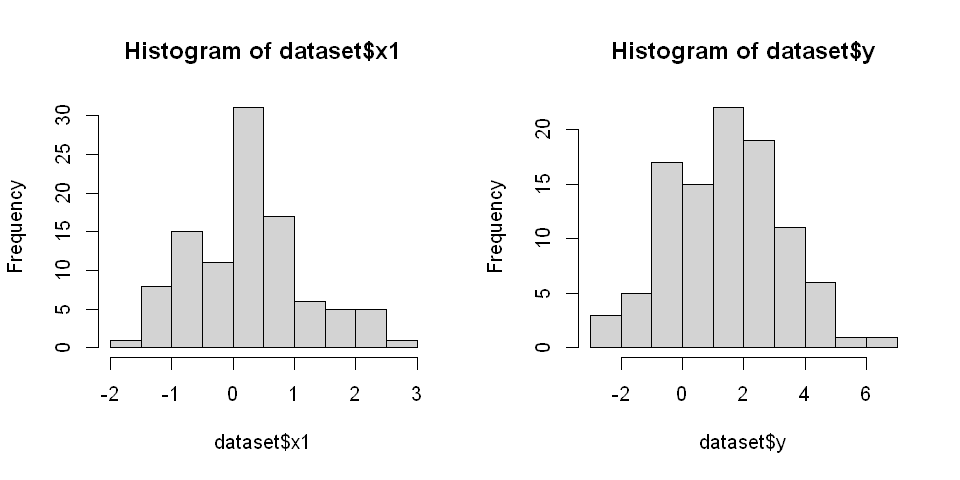

In [2]:
summary(dataset)

options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))
hist(dataset$x1, n = 10, probability = FALSE)
hist(dataset$y, n = 10, probability = FALSE)

,x1,y,z1,z2,z3
x1,1.0000000,0.8862192,0.533152714,0.224616700,0.52353112
y,0.8862192,1.0000000,0.330755084,0.020140503,0.48092751
z1,0.5331527,0.3307551,1.000000000,0.004667249,0.05694113
z2,0.2246167,0.0201405,0.004667249,1.000000000,-0.05752523
z3,0.5235311,0.4809275,0.056941132,-0.057525232,1.00000000


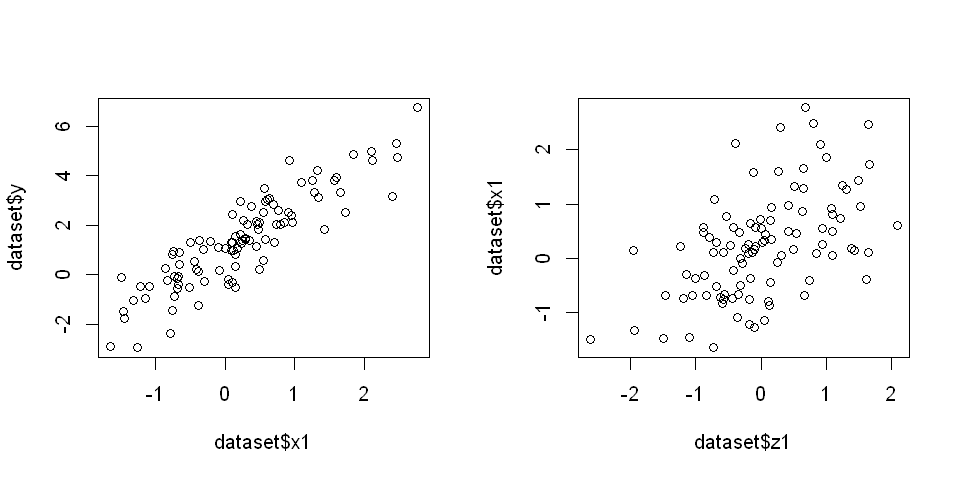

In [3]:
cor(dataset[,2:6])

options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))
plot(dataset$x1, dataset$y, type = 'p')
plot(dataset$z1, dataset$x1, type = 'p')

---
### OLS results vs. 2SLS results

Now, we compare the OLS estimation results with those of the  'manual' 2SLS, the 'alternative' 2SLS, and the standard  2SLS in which effect of $x_1$ on $y$ is estimated using $z_1$ as an instrument. For a simple LRM, the first stage regression also serves as the Weak instrument test. We finish with the Hausman test.

In [27]:
library('car')
library('lmtest')
library('AER')
library('systemfit')

---
#### OLS

$$y_i = \beta_0 + \beta_1 x_{1i} + u_i$$

In [5]:
model.OLS <- lm(y ~ x1, data = dataset)
summary(model.OLS)


Call:
lm(formula = y ~ x1, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0114 -0.4503  0.0513  0.5717  2.0530 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.97889    0.08828   11.09   <2e-16 ***
x1           1.70343    0.08995   18.94   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8562 on 98 degrees of freedom
Multiple R-squared:  0.7854,	Adjusted R-squared:  0.7832 
F-statistic: 358.6 on 1 and 98 DF,  p-value: < 2.2e-16


### Some OLS issues (recap, will be covered only very briefly, code for your advantage):

We now very briefly repeat/demonstrate how to check violations of the Classical assumptions of the OLS discussed in the lecture.

#### Multicollinearity:

Correlation matrix of regressors, VIF

To demonstrate the impact of strong multicollinearity, we first draw two random samples of uniformly distributed noises/errors.

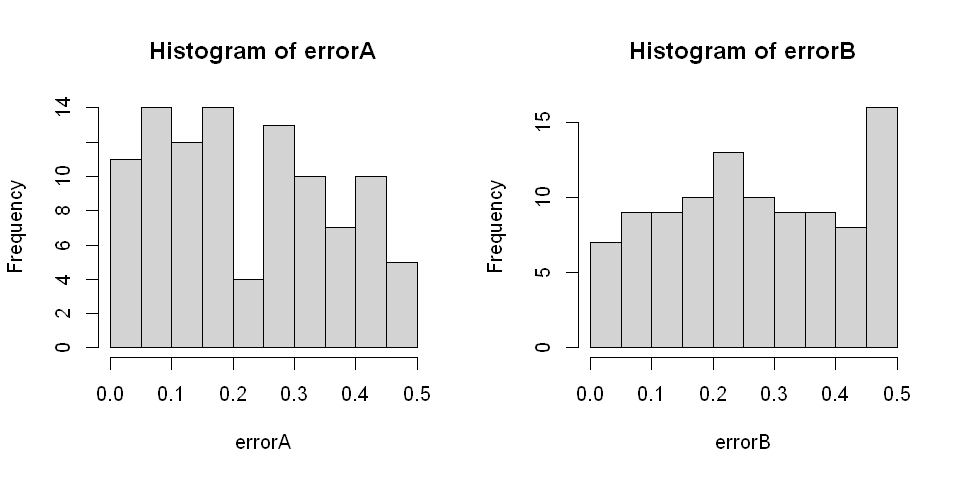

In [6]:
set.seed(1234)
errorA <- runif(length(dataset$x1), min = 0, max = 0.5)
errorB <- runif(length(dataset$x1), min = 0, max = 0.5)

options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))
hist(errorA, n = 10, probability = FALSE)
hist(errorB, n = 10, probability = FALSE)

We add these two noises to the x1 variable. This creates two slightly different but essentially similar, i.e., strongly correlated variables. We then estimate the model with both used as explanatory variables via OLS. While x1 was strongly significant in the previous regression, x1A, and x1B are insignificant at the 5% significance level. The original impact of x1 (1.7, see above) is roughly equally split between the two.

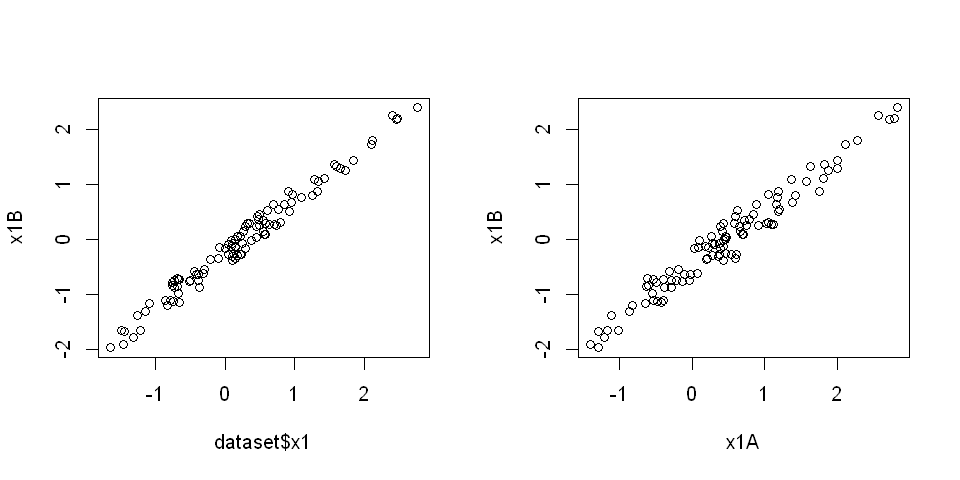

In [7]:
x1A <- dataset$x1 + errorA
x1B <- dataset$x1 - errorB

options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))
plot(dataset$x1, x1B, type = 'p')
plot(x1A, x1B, type = 'p')

In [8]:
model.OLS.multicoll <- lm(dataset$y ~ x1A + x1B)
summary(model.OLS.multicoll)


Call:
lm(formula = dataset$y ~ x1A + x1B)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.99411 -0.39854  0.04887  0.47596  2.15270 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0033     0.2394   4.191 6.12e-05 ***
x1A           0.8822     0.4590   1.922   0.0576 .  
x1B           0.8261     0.4662   1.772   0.0795 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9001 on 97 degrees of freedom
Multiple R-squared:  0.7652,	Adjusted R-squared:  0.7604 
F-statistic: 158.1 on 2 and 97 DF,  p-value: < 2.2e-16


We finally verify that the correlation between x1A and x1B (> 80%) and the resulting VIF of x1A (> 5) are both large. This suggests a strong multicollinearity issue.

In [9]:
library(car)

print(cor(x1A, x1B))

model.OLS.VIF <- lm(x1A ~ x1B)
summary(model.OLS.VIF)
VIF <- 1/(1-summary(model.OLS.VIF)$r.squared) # Variance Inflation Factor manual
print(VIF)

vif(model.OLS.multicoll) # Variance Inflation Factor automated

[1] 0.9784243



Call:
lm(formula = x1A ~ x1B)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41295 -0.14286  0.00342  0.13568  0.46117 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48313    0.01981   24.38   <2e-16 ***
x1B          0.99371    0.02120   46.88   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1981 on 98 degrees of freedom
Multiple R-squared:  0.9573,	Adjusted R-squared:  0.9569 
F-statistic:  2198 on 1 and 98 DF,  p-value: < 2.2e-16


[1] 23.427


x1A    x1B 
23.427 23.427

#### Ramsey RESET test

The null hypothesis: model specification is correct

In [10]:
library(lmtest)

resettest(model.OLS, power = 2:3)


	RESET test

data:  model.OLS
RESET = 0.082092, df1 = 2, df2 = 96, p-value = 0.9213


#### Heteroskedasticity:

Breusch-Pagan test (Koenker studentized version), White test

- for both, the null hypothesis: no heteroskedasticity

White robust standard errors

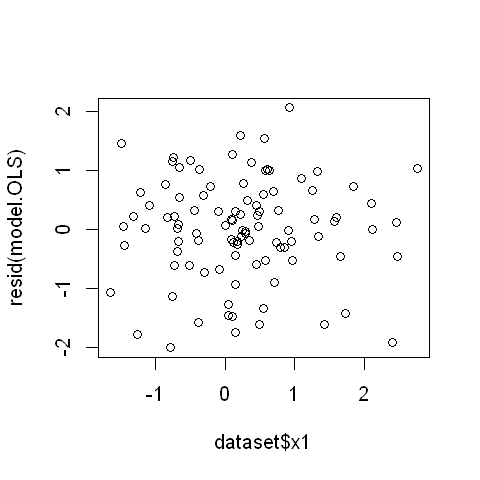

In [11]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(dataset$x1, resid(model.OLS), type = 'p')

In [12]:
library(AER)

bptest(model.OLS) #Breusch-Pagan/Koenker test
bptest(model.OLS, ~ x1 + I(x1^2), data = dataset) #White test

het.robust.OLS <- coeftest(model.OLS, vcov = vcovHC(model.OLS)) #gives White heteroscedasticity robust standard errors
print(het.robust.OLS)


	studentized Breusch-Pagan test

data:  model.OLS
BP = 0.0010122, df = 1, p-value = 0.9746



	studentized Breusch-Pagan test

data:  model.OLS
BP = 0.62215, df = 2, p-value = 0.7327



t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 0.978893   0.089536  10.933 < 2.2e-16 ***
x1          1.703431   0.099699  17.086 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



#### Autocorrelation:

Durbin-Watson test, Breusch-Godfrey test

- for both, the null hypothesis: no autocorrelation

Newey-West robust standard errors

In [13]:
dwtest(model.OLS)
bgtest(model.OLS, order = 2)

hac.robust.OLS <- coeftest(model.OLS, vcovHAC) #gives Newey-West heteroskedasticity and autocorrelation robust standard errors
print(hac.robust.OLS)


	Durbin-Watson test

data:  model.OLS
DW = 2.1036, p-value = 0.6974
alternative hypothesis: true autocorrelation is greater than 0



	Breusch-Godfrey test for serial correlation of order up to 2

data:  model.OLS
LM test = 1.3185, df = 2, p-value = 0.5172



t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 0.978893   0.087517  11.185 < 2.2e-16 ***
x1          1.703431   0.095357  17.864 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



#### Normality:

Many tests, e.g. the Shapiro-Wilk test of normality with the null hypothesis: sample comes from a normally distributed population.


	Shapiro-Wilk normality test

data:  resid(model.OLS)
W = 0.97771, p-value = 0.08803


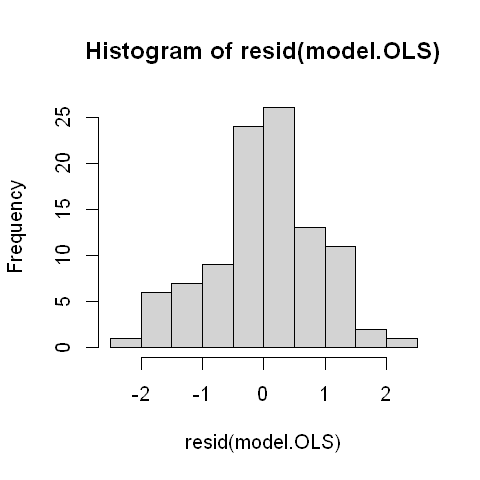

In [14]:
options(repr.plot.width = 4, repr.plot.height = 4)
hist(resid(model.OLS), n = 10, probability = FALSE)

shapiro.test(resid(model.OLS))

---
### Back to 2SLS

#### 1. stage

Regress endogenous variable on the instrument(s) and exogenous variables to obtain fitted values $\widehat{x}_{1i}$:
$$x_{1i} = \gamma_0 + \gamma_1 z_{1i} + \ldots + v_i$$

In [15]:
model.1.stage <- lm(x1 ~ z1, data = dataset)
summary(model.1.stage)


Call:
lm(formula = x1 ~ z1, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.52884 -0.56537 -0.02344  0.47179  2.15291 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.21963    0.08141   2.698  0.00822 ** 
z1           0.57109    0.09154   6.239 1.13e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8135 on 98 degrees of freedom
Multiple R-squared:  0.2843,	Adjusted R-squared:  0.2769 
F-statistic: 38.92 on 1 and 98 DF,  p-value: 1.125e-08


---
#### 2. stage

Replace endogenous variable by fitted values from the first step to obtain (causal) effect of $x_1$ on $y$:
$$y_i= \beta_0 + \beta_1 \widehat{x}_{1i} + u_i$$

In [16]:
# using OLS in 2nd stage to get the coefficients. 
# WARNING: The standard errors you would get from this regression are incorrect, 
# as we have to adjust because we are using fitted values in the second stage. 
# We can get the errors either manually (we know the variance of the 2SLS estimator) or using ivreg function from AER package.
# see Wooldridge textbook for further explanation.
model.2.stage <- lm(y ~ fitted(model.1.stage), data = dataset)
model.2.stage$coefficients

(Intercept) fitted(model.1.stage) 
             1.101101              1.192445

### 2SLS using ivreg function from AER package:
- we specify dependent variable, independent variables and exogenous variables (our instruments and exogenous independent variables)
- performs the 2SLS estimation, gives us coefficients with standard errors, and diagnostic tests.

In [17]:
# using function ivreg from AER package, performs
model.2SLS.1 <- ivreg(y ~ x1 | z1 , data = dataset)
summary(model.2SLS.1, diagnostics = TRUE)


Call:
ivreg(formula = y ~ x1 | z1, data = dataset)

Residuals:
      Min        1Q    Median        3Q       Max 
-2.556494 -0.597637 -0.001231  0.687072  2.405226 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.1011     0.1091   10.09  < 2e-16 ***
x1            1.1924     0.1945    6.13 1.84e-08 ***

Diagnostic tests:
                 df1 df2 statistic  p-value    
Weak instruments   1  98     38.92 1.13e-08 ***
Wu-Hausman         1  97     14.59 0.000235 ***
Sargan             0  NA        NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9872 on 98 degrees of freedom
Multiple R-Squared: 0.7147,	Adjusted R-squared: 0.7118 
Wald test: 37.58 on 1 and 98 DF,  p-value: 1.844e-08 


---
## Diagnostic tests

**Weak instrument(s) test:**
- null hypothesis: all instruments are weak (joint insignificance of all instruments in the 1. stage regression)
- test statistic: $F$

**Wu-Hausman test:**
- null hypothesis: no endogeneity (OLS estimator is consistent)
- test statistic: $Wald$
- asymptotic distribution: $\chi^2$

**Sargan over-identification test:**
- null hypothesis: all instruments are valid
- test statistic: $LM$
- asymptotic distribution: $\chi^2$

---
#### Hausman test considering all coefficients (i.e. also the intercept)

In [18]:
library(systemfit)

ols <- systemfit(y ~ x1, data = dataset, method = 'OLS')
iv <- systemfit(y ~ x1, data = dataset, method = '2SLS', inst = ~ z1)

hausman.systemfit(iv, ols)


	Hausman specification test for consistency of the 3SLS estimation

data:  dataset
Hausman = 8.7778, df = 2, p-value = 0.01241


#### Sargan test
- only if we have more instruments than endogenous variables

In [19]:
### available in the summary diagnostics:
model.2SLS.2 <- ivreg(y ~ x1 | z1 + z3, data = dataset)
summary(model.2SLS.2, diagnostics = TRUE)


Call:
ivreg(formula = y ~ x1 | z1 + z3, data = dataset)

Residuals:
      Min        1Q    Median        3Q       Max 
-2.248297 -0.430795 -0.005084  0.540930  2.211455 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.03387    0.09356   11.05   <2e-16 ***
x1           1.47355    0.12782   11.53   <2e-16 ***

Diagnostic tests:
                 df1 df2 statistic p-value    
Weak instruments   2  97    54.311 < 2e-16 ***
Wu-Hausman         1  97     7.824 0.00622 ** 
Sargan             1  NA     5.749 0.01649 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8843 on 98 degrees of freedom
Multiple R-Squared: 0.7711,	Adjusted R-squared: 0.7687 
Wald test: 132.9 on 1 and 98 DF,  p-value: < 2.2e-16 


In [20]:
# Sargan test calculated manually:
model.2SLS.2 <- ivreg(y ~ x1 | z1 + z3, data = dataset)

regression <- lm(resid(model.2SLS.2) ~ z1 + z3, data = dataset)
summary(regression)
LM <- summary(regression)$r.squared * length(dataset$y)
print(LM)
print(qchisq(0.95, df = 1))
print(1 - pchisq(LM, df = 1))


Call:
lm(formula = resid(model.2SLS.2) ~ z1 + z3, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.16017 -0.47401  0.02251  0.63618  2.26404 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.002933   0.086482  -0.034   0.9730  
z1          -0.170415   0.097261  -1.752   0.0829 .
z3           0.140897   0.078963   1.784   0.0775 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8629 on 97 degrees of freedom
Multiple R-squared:  0.05749,	Adjusted R-squared:  0.03806 
F-statistic: 2.959 on 2 and 97 DF,  p-value: 0.0566


[1] 5.749333
[1] 3.841459
[1] 0.01649491


---
## Example using labour data

Does education affect wages?

$$log(wage_i) = \beta_0 + \beta_1 educ_i + \beta_2 exper_1 + \beta_{3} exper_i^2 + u_i$$

We suspect education endogenous, so we need some good instruments. Ideally, correlated with education, uncorrelated with $u$ and not having a direct effect on wages. Prospective candidates: mother's and father's education.

Import the data from ```mroz.csv```.

This example is motivated by: Mroz, T. A. (1987). The sensitivity of an empirical model of a married woman's hours of work to economic and statistical assumptions. *Econometrica*, 55, 765-800.

In [21]:
rm(list = ls())

datasetmroz <- read.csv('mroz.csv', header = TRUE)
str(datasetmroz)
sapply(datasetmroz, function(x) sum(is.na(x)))
       
head(datasetmroz,5)
tail(datasetmroz,5)

'data.frame':	753 obs. of  20 variables:
 $ inlf    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hours   : int  1610 1656 1980 456 1568 2032 1440 1020 1458 1600 ...
 $ kidslt6 : int  1 0 1 0 1 0 0 0 0 0 ...
 $ kidsge6 : int  0 2 3 3 2 0 2 0 2 2 ...
 $ age     : int  32 30 35 34 31 54 37 54 48 39 ...
 $ educ    : int  12 12 12 12 14 12 16 12 12 12 ...
 $ wage    : num  3.35 1.39 4.55 1.1 4.59 ...
 $ repwage : num  2.65 2.65 4.04 3.25 3.6 4.7 5.95 9.98 0 4.15 ...
 $ hushrs  : int  2708 2310 3072 1920 2000 1040 2670 4120 1995 2100 ...
 $ husage  : int  34 30 40 53 32 57 37 53 52 43 ...
 $ huseduc : int  12 9 12 10 12 11 12 8 4 12 ...
 $ huswage : num  4.03 8.44 3.58 3.54 10 ...
 $ faminc  : int  16310 21800 21040 7300 27300 19495 21152 18900 20405 20425 ...
 $ mtr     : num  0.722 0.661 0.692 0.781 0.622 ...
 $ motheduc: int  12 7 12 7 12 14 14 3 7 7 ...
 $ fatheduc: int  7 7 7 7 14 7 7 3 7 7 ...
 $ unem    : num  5 11 5 5 9.5 7.5 5 5 3 5 ...
 $ city    : int  0 1 0 0 1 1 0 0 0 0 ...
 $ exper   : in

inlf    hours  kidslt6  kidsge6      age     educ     wage  repwage 
       0        0        0        0        0        0        0        0 
  hushrs   husage  huseduc  huswage   faminc      mtr motheduc fatheduc 
       0        0        0        0        0        0        0        0 
    unem     city    exper nwifeinc 
       0        0        0        0

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,huseduc,huswage,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
1,1,1610,1,0,32,12,3.3540,2.65,2708,34,12,4.0288,16310,0.7215,12,7,5.0,0,14,10.910060
2,1,1656,0,2,30,12,1.3889,2.65,2310,30,9,8.4416,21800,0.6615,7,7,11.0,1,5,19.499980
3,1,1980,1,3,35,12,4.5455,4.04,3072,40,12,3.5807,21040,0.6915,12,7,5.0,0,15,12.039910
4,1,456,0,3,34,12,1.0965,3.25,1920,53,10,3.5417,7300,0.7815,7,7,5.0,0,6,6.799996
5,1,1568,1,2,31,14,4.5918,3.60,2000,32,12,10.0000,27300,0.6215,12,14,9.5,1,7,20.100060


,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,huseduc,huswage,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
749,0,0,0,2,40,13,0,0,3020,43,16,9.2715,28200,0.6215,10,10,9.5,1,5,28.200
750,0,0,2,3,31,12,0,0,2056,33,12,4.8638,10000,0.7715,12,12,7.5,0,14,10.000
751,0,0,0,0,43,12,0,0,2383,43,12,1.0898,9952,0.7515,10,3,7.5,0,4,9.952
752,0,0,0,0,60,12,0,0,1705,55,8,12.4400,24984,0.6215,12,12,14.0,1,15,24.984
753,0,0,0,3,39,9,0,0,3120,48,12,6.0897,28363,0.6915,7,7,11.0,1,12,28.363


Variable name | Descriptive label
--------------|--------------
inlf          | =1 if in labor force, 1975
hours         | hours worked, 1975
kidslt6       | # kids < 6 years
kidsge6       | # kids 6-18
age           | woman's age in yrs
educ          | years of schooling
wage          | estimated wage from earns., USD per hour
repwage       | reported wage at interview in 1976, USD per hour
hushrs        | hours worked by husband, 1975
husage        | husband's age
huseduc       | husband's years of schooling
huswage       | husband's hourly wage, 1975
faminc        | family income, 1975
mtr           | fed. marginal tax rate facing woman
motheduc      | mother's years of schooling
fatheduc      | father's years of schooling
unem          | unem. rate in county of resid.
city          | =1 if live in SMSA
exper         | actual labor mkt exper
nwifeinc      | (faminc - wage*hours)/1000

In [22]:
summary(datasetmroz)

sum(datasetmroz$wage>0)
sum(datasetmroz$wage==0)

      inlf            hours           kidslt6          kidsge6     
 Min.   :0.0000   Min.   :   0.0   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:   0.0   1st Qu.:0.0000   1st Qu.:0.000  
 Median :1.0000   Median : 288.0   Median :0.0000   Median :1.000  
 Mean   :0.5684   Mean   : 740.6   Mean   :0.2377   Mean   :1.353  
 3rd Qu.:1.0000   3rd Qu.:1516.0   3rd Qu.:0.0000   3rd Qu.:2.000  
 Max.   :1.0000   Max.   :4950.0   Max.   :3.0000   Max.   :8.000  
      age             educ            wage           repwage         hushrs    
 Min.   :30.00   Min.   : 5.00   Min.   : 0.000   Min.   :0.00   Min.   : 175  
 1st Qu.:36.00   1st Qu.:12.00   1st Qu.: 0.000   1st Qu.:0.00   1st Qu.:1928  
 Median :43.00   Median :12.00   Median : 1.625   Median :0.00   Median :2164  
 Mean   :42.54   Mean   :12.29   Mean   : 2.375   Mean   :1.85   Mean   :2267  
 3rd Qu.:49.00   3rd Qu.:13.00   3rd Qu.: 3.788   3rd Qu.:3.58   3rd Qu.:2553  
 Max.   :60.00   Max.   :17.00   Max.   :25.

[1] 428

[1] 325

In [23]:
datasetmroz2 <- datasetmroz[datasetmroz$wage > 0,]
str(datasetmroz2)

cor(datasetmroz2[,c(6,15,16)])

'data.frame':	428 obs. of  20 variables:
 $ inlf    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hours   : int  1610 1656 1980 456 1568 2032 1440 1020 1458 1600 ...
 $ kidslt6 : int  1 0 1 0 1 0 0 0 0 0 ...
 $ kidsge6 : int  0 2 3 3 2 0 2 0 2 2 ...
 $ age     : int  32 30 35 34 31 54 37 54 48 39 ...
 $ educ    : int  12 12 12 12 14 12 16 12 12 12 ...
 $ wage    : num  3.35 1.39 4.55 1.1 4.59 ...
 $ repwage : num  2.65 2.65 4.04 3.25 3.6 4.7 5.95 9.98 0 4.15 ...
 $ hushrs  : int  2708 2310 3072 1920 2000 1040 2670 4120 1995 2100 ...
 $ husage  : int  34 30 40 53 32 57 37 53 52 43 ...
 $ huseduc : int  12 9 12 10 12 11 12 8 4 12 ...
 $ huswage : num  4.03 8.44 3.58 3.54 10 ...
 $ faminc  : int  16310 21800 21040 7300 27300 19495 21152 18900 20405 20425 ...
 $ mtr     : num  0.722 0.661 0.692 0.781 0.622 ...
 $ motheduc: int  12 7 12 7 12 14 14 3 7 7 ...
 $ fatheduc: int  7 7 7 7 14 7 7 3 7 7 ...
 $ unem    : num  5 11 5 5 9.5 7.5 5 5 3 5 ...
 $ city    : int  0 1 0 0 1 1 0 0 0 0 ...
 $ exper   : in

,educ,motheduc,fatheduc
educ,1.0000000,0.3870198,0.4154030
motheduc,0.3870198,1.0000000,0.5540632
fatheduc,0.4154030,0.5540632,1.0000000


In [24]:
model.OLS.wage <- lm(log(wage) ~ educ + exper + I(exper^2), data = datasetmroz2)
summary(model.OLS.wage)


Call:
lm(formula = log(wage) ~ educ + exper + I(exper^2), data = datasetmroz2)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.08404 -0.30627  0.04952  0.37498  2.37115 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.5220406  0.1986321  -2.628  0.00890 ** 
educ         0.1074896  0.0141465   7.598 1.94e-13 ***
exper        0.0415665  0.0131752   3.155  0.00172 ** 
I(exper^2)  -0.0008112  0.0003932  -2.063  0.03974 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6664 on 424 degrees of freedom
Multiple R-squared:  0.1568,	Adjusted R-squared:  0.1509 
F-statistic: 26.29 on 3 and 424 DF,  p-value: 1.302e-15


In [25]:
model.2SLS.M <- ivreg(log(wage) ~ educ + exper + I(exper^2) | exper + I(exper^2) + motheduc, data = datasetmroz2)
summary(model.2SLS.M, diagnostics = TRUE)


Call:
ivreg(formula = log(wage) ~ educ + exper + I(exper^2) | exper + 
    I(exper^2) + motheduc, data = datasetmroz2)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.10804 -0.32633  0.06024  0.36772  2.34351 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.1981861  0.4728772   0.419  0.67535   
educ         0.0492630  0.0374360   1.316  0.18891   
exper        0.0448558  0.0135768   3.304  0.00103 **
I(exper^2)  -0.0009221  0.0004064  -2.269  0.02377 * 

Diagnostic tests:
                 df1 df2 statistic p-value    
Weak instruments   1 424    73.946  <2e-16 ***
Wu-Hausman         1 423     2.968  0.0856 .  
Sargan             0  NA        NA      NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6796 on 424 degrees of freedom
Multiple R-Squared: 0.1231,	Adjusted R-squared: 0.1169 
Wald test: 7.348 on 3 and 424 DF,  p-value: 8.228e-05 


In [26]:
model.2SLS.MF <- ivreg(log(wage) ~ educ + exper + I(exper^2) | exper + I(exper^2) + motheduc + fatheduc, data = datasetmroz2)
summary(model.2SLS.MF, diagnostics = TRUE)


Call:
ivreg(formula = log(wage) ~ educ + exper + I(exper^2) | exper + 
    I(exper^2) + motheduc + fatheduc, data = datasetmroz2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0986 -0.3196  0.0551  0.3689  2.3493 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.0481003  0.4003281   0.120  0.90442   
educ         0.0613966  0.0314367   1.953  0.05147 . 
exper        0.0441704  0.0134325   3.288  0.00109 **
I(exper^2)  -0.0008990  0.0004017  -2.238  0.02574 * 

Diagnostic tests:
                 df1 df2 statistic p-value    
Weak instruments   2 423    55.400  <2e-16 ***
Wu-Hausman         1 423     2.793  0.0954 .  
Sargan             1  NA     0.378  0.5386    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6747 on 424 degrees of freedom
Multiple R-Squared: 0.1357,	Adjusted R-squared: 0.1296 
Wald test: 8.141 on 3 and 424 DF,  p-value: 2.787e-05 
